<a href="https://colab.research.google.com/github/sarahaptumich/capstone/blob/shaptonstall/data_exploration_breakers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Connect to Google Drive![pd3.png](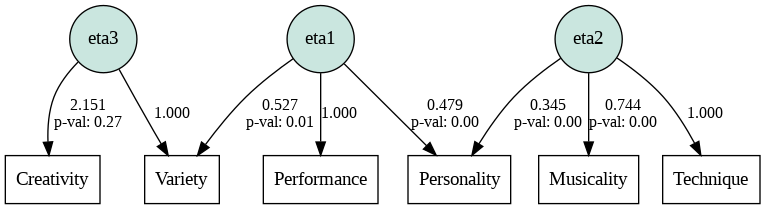![pd2.png](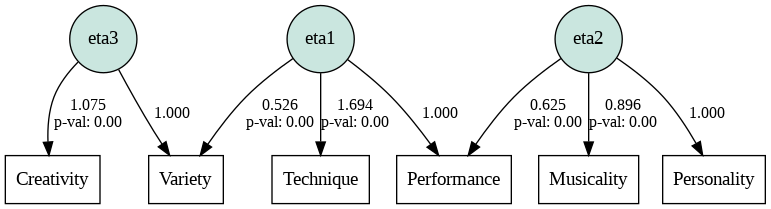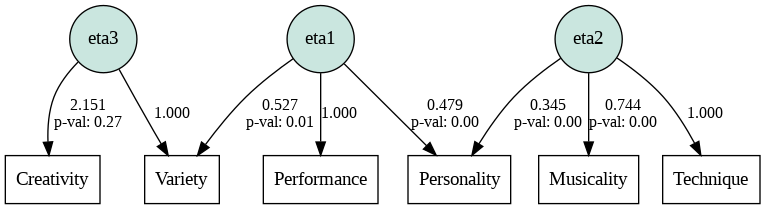))

In [ ]:
#Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Github/capstone

/content/drive/MyDrive/Github/capstone


In [ ]:
#!git pull   #check that git us up to date
#!git checkout -b shaptonstall # create a new branch

#!git push origin shaptonstall #commit changes to my branch

In [ ]:
# to commit to github
#!git status # check untracked files
#!git add {filename} # add the files
#!git config --global user.email "sarahapt@umich.edu"
# !git commit

In [ ]:
pip install factor-analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 2.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor-analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42564 sha256=34c881d154b7ac0110be02c57f62cc443f7a880a5baa3b63f9d908a9285ebcb8
  Stored in directory: /root/.cache/pip/wheels/24/59/82/6493618e30ed1cb7a013b9e1b0c9e17de80b04dfcef4ba8a4d
Successfully built factor-analyzer


In [ ]:
pip install semopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 13.5 MB/s eta 0:00:00
  Created wheel for semopy: filename=semopy-2.3.11-py3-none-any.whl size=1659680 sha256=5eed14407b4c8f3b51ac81d63d5ae3de3ead31b45d30578227ea1b9eb5a9fb1b
  Stored in directory: /root/.cache/pip/wheels/53/ec/0d/0b294c02d8c4e9e80afea58839f2c1b4706770594bc99ec045
Successfully built semopy


Import libraries

In [ ]:
import pandas as pd
import numpy as np
import re
from datetime import datetime, timedelta
from sklearn.decomposition import PCA, KernelPCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer
from sklearn.decomposition import FactorAnalysis
from factor_analyzer import calculate_bartlett_sphericity, calculate_kmo
from factor_analyzer import Rotator
from factor_analyzer import (ConfirmatoryFactorAnalyzer, ModelSpecificationParser)
from semopy import Model
from semopy import Optimizer
from semopy.inspector import inspect
from semopy import gather_statistics
import semopy
from semopy import ModelMeans

In [ ]:
!ls

 Capstone.ipynb		  pd	   README.md			        Webscraping.xlsx
 data_exploration.ipynb   pd.png  'trivium_full_column_names (1).csv'


In [ ]:
# Load all sheets into a dictionary of DataFrames
webscraping = pd.read_excel('Webscraping.xlsx', sheet_name=None)



In [ ]:
webscraping.keys()
# webscraping['Events and8']

dict_keys(['Events and8', 'Events WDSF', 'Battles Trivium', 'Battles and8 Threefold', 'Battles and8 Single Slider', 'Battles and8 Round by Round', 'Battles and8 Traditional', 'Research Questions', 'Notes', 'Notes Columns'])

Events details

In [ ]:
eventsAnd8=webscraping['Events and8'][1:].copy()
new_header= eventsAnd8.iloc[0]
eventsAnd8=eventsAnd8.drop(1)
eventsAnd8.columns = new_header
eventsAnd8.rename(columns={'Name':'Event'}, inplace=True)
eventsAnd8.drop_duplicates(subset=['Event'], inplace=True)

eventsWDSF = webscraping['Events WDSF'][1:].copy()
new_header = eventsWDSF.iloc[0]
eventsWDSF = eventsWDSF.drop(1)
eventsWDSF.columns = new_header
eventsWDSF.rename(columns={'Name': 'Event'}, inplace=True)
eventsWDSF.drop_duplicates(subset=['Event'], inplace=True)

combined_events = pd.concat([eventsAnd8, eventsWDSF], ignore_index=True)


Threefold Battles

In [ ]:
#threefold battles
threefold = webscraping['Battles and8 Threefold']
threefold.rename(columns={'Unnamed: 0':'Event', 'Unnamed: 1': 'Category'}, inplace=True)
threefold[['Event', 'Category']] = threefold[['Event', 'Category']].fillna(method='ffill')
threefold.head(2)

,Event,Category,breaker 1,breaker 2,winner,battle rounds,number of judges,breaker 1 round wins,breaker 2 round wins,breaker 1 vote count,...,r3j7arti,r3j7inte,r3j8over,r3j8phys,r3j8arti,r3j8inte,r3j9over,r3j9phys,r3j9arti,r3j9inte
0,Campionato Italiano di Categoria Breaking FIDS...,1vs1 BBoy 12-15 C Top 16 KnockOut,Baruzzo,Elpablix,Baruzzo,3,3,2,1,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Campionato Italiano di Categoria Breaking FIDS...,1vs1 BBoy 12-15 C Top 16 KnockOut,Yoga,Faby,Faby,2,3,0,2,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Trivium Battles

In [ ]:
trivium=webscraping['Battles Trivium']
trivium.rename(columns={'Unnamed: 0':'Event', 'Unnamed: 1': 'Category'}, inplace=True)
trivium[['Event', 'Category']]= trivium[['Event', 'Category']].fillna(method='ffill')


In [ ]:
trivium_columns=list(trivium.columns)
exclude=['judge 1 name ', 'judge 2 name', 'judge 3 name', 'judge 4 name', 'judge 5 name', 'judge 6 name ', 'judge 7 name', 'judge 8 name', 'judge 9 name'  ]
trivium_columns= [x for x in trivium_columns if x not in exclude]
trivium=trivium[trivium_columns]
trivium['BattleID']= trivium.index

<ipython-input-15-a75688204c39>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trivium['BattleID']= trivium.index


In [ ]:
category_sums_blue = {
    "Creativity": trivium.filter(like="crea").sum(axis=1),
    "Musicality": trivium.filter(like="musi").sum(axis=1),
    "Performance": trivium.filter(like="perf").sum(axis=1),
    "Personality": trivium.filter(like="pers").sum(axis=1),
    "Technique": trivium.filter(like="tech").sum(axis=1),
    "Variety": trivium.filter(like="vari").sum(axis=1),
    "Overall":  trivium.filter(like="over").sum(axis=1)
}

category_sums_red = {
    "Creativity": trivium.filter(like="crea").sum(axis=1)*-1,
    "Musicality": trivium.filter(like="musi").sum(axis=1)*-1,
    "Performance": trivium.filter(like="perf").sum(axis=1)*-1,
    "Personality": trivium.filter(like="pers").sum(axis=1)*-1,
    "Technique": trivium.filter(like="tech").sum(axis=1)*-1,
    "Variety": trivium.filter(like="vari").sum(axis=1)*-1,
    "Overall":  trivium.filter(like="over").sum(axis=1)*-1
}

In [ ]:
scorecardBlue=pd.DataFrame({
    "Event": trivium['Event'],
    'Category': trivium['Category'],
    "BattleID": trivium["BattleID"],
    "Side": "BLUE",
    "Breaker": trivium["breaker 2 (blue)"],
        **category_sums_blue,
})

scorecardRed=pd.DataFrame({
    "Event": trivium['Event'],
    'Category': trivium['Category'],
    "BattleID": trivium["BattleID"],
    "Side": "RED",
    "Breaker": trivium["breaker 1 (red)"],
     **category_sums_red,
})

In [ ]:
scorecard = pd.concat([scorecardBlue, scorecardRed], ignore_index=True)
scorecard['Score Type']="trivium"
scorecard.shape

(3052, 13)

In [ ]:
scorecard=pd.merge(scorecard, eventsAnd8[['Date', 'Event']], on='Event', how='left')
# today = scorecard['Date'].max()
# total_days = (today - scorecard['Date'].min()).days + 1  # Get the total number of days dynamically
# scorecard['Weight'] = ((today - scorecard['Date']).dt.days / total_days) * 100
# scorecard['Weight'] = 100 - scorecard['Weight']  # Reverse the weights so that newer dates have higher weights

Trivium PCA

In [ ]:
# triviumFloat=
triviumScore=scorecardBlue[['Creativity', 'Musicality', 'Performance', 'Personality', 'Technique', 'Variety']]

In [ ]:
#imputer also get feature name for plotting later
names=triviumScore.columns
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
triviumNorm = imputer.fit_transform(triviumScore)
features=imputer.get_feature_names_out(input_features= names)


#normalize float columns
triviumNorm= StandardScaler().fit(triviumNorm).transform(triviumNorm)


In [ ]:
#set PCA
pca = PCA(n_components=3, random_state=0).fit(triviumNorm)
X_pca = pca.transform(triviumNorm)
X_pca.shape, triviumNorm.shape

((1526, 3), (1526, 6))

In [ ]:
loadings_abs = np.abs(pca.components_)
pcs = ['PC1', 'PC2', 'PC3']

# Create DataFrame
pca_loadings = pd.DataFrame(loadings_abs.T, columns=pcs, index=features)



In [ ]:
print( " factor Analysis accum variance: ",np.cumsum(pca.explained_variance_ratio_)[2])

 factor Analysis accum variance:  0.8822364614685656


In [ ]:
pca_loadings.style.background_gradient()

,PC1,PC2,PC3
Creativity,0.362888,0.143561,0.713032
Musicality,0.403575,0.450374,0.269483
Performance,0.469467,0.239068,0.327888
Personality,0.409212,0.452774,0.295638
Technique,0.350112,0.704047,0.190013
Variety,0.441596,0.136793,0.433527


**Factor Analysis.**
Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for factor analysis. It determines the adequacy for each observed variable and for the complete model. KMO estimates the proportion of variance among all the observed variable. Lower proportion id more suitable for factor analysis. KMO values range between 0 and 1. Value of KMO less than 0.6 is considered inadequate.

In [ ]:
kmo_all,kmo_model=calculate_kmo(triviumNorm)
kmo_model

0.6828153227522676

In [ ]:
# perform factor analysis
fa = FactorAnalyzer(3, rotation=None)
fa.fit(triviumNorm)
X_transformed = fa.fit_transform(triviumNorm)

In [ ]:
print( " factor Analysis accum variance: ",fa.get_factor_variance()[2][-1], fa.get_params())

 factor Analysis accum variance:  0.7885636265232234 {'bounds': (0.005, 1), 'impute': 'median', 'is_corr_matrix': False, 'method': 'minres', 'n_factors': 3, 'rotation': None, 'rotation_kwargs': {}, 'svd_method': 'randomized', 'use_smc': True}


In [ ]:
faLoadings=np.abs(fa.loadings_)
fa = ['Factor1', 'Factor2', 'Factor3']

# Create DataFrame
fa_loadings = pd.DataFrame(faLoadings, columns=pcs, index=features)

# fa_loadings.T.plot.bar(figsize=(10, 20), subplots=True)


In [ ]:
fa_loadings.style.background_gradient()

,PC1,PC2,PC3
Creativity,0.584749,0.144549,0.356931
Musicality,0.669645,0.352689,0.148181
Performance,0.850926,0.149023,0.278467
Personality,0.728653,0.465250,0.282656
Technique,0.682145,0.707579,0.173523
Variety,0.840725,0.059744,0.537386


In [ ]:
pca_loadings.style.background_gradient()

,PC1,PC2,PC3
Creativity,0.362888,0.143561,0.713032
Musicality,0.403575,0.450374,0.269483
Performance,0.469467,0.239068,0.327888
Personality,0.409212,0.452774,0.295638
Technique,0.350112,0.704047,0.190013
Variety,0.441596,0.136793,0.433527


In [ ]:
normdf = pd.DataFrame(triviumNorm, columns=features)
normdf

,Creativity,Musicality,Performance,Personality,Technique,Variety
0,-1.516892,-0.136318,0.560938,0.313784,2.168559,-1.087127
1,0.104730,0.941751,1.159945,1.219928,1.537056,0.823927
2,-0.986180,-0.407644,0.994701,0.134033,1.989348,1.752689
3,-0.204852,-1.808894,-2.155249,0.202978,-1.040159,-2.638185
4,2.301292,1.279402,-1.318704,-0.110971,-1.620459,1.233439
...,...,...,...,...,...,...
1521,0.709153,0.523306,0.612576,0.514465,0.530065,0.216351
1522,0.576475,-0.313585,0.602249,0.168505,0.231381,-0.140968
1523,1.490480,-0.024170,0.808803,1.334427,-0.118506,0.145423
1524,1.136672,0.859751,0.437005,0.563712,0.350854,0.554934


In [ ]:
model_spec = '''Physical=~ Technique + Variety
Artistic =~ Creativity + Personality
Interpretive =~ Performance + Musicality
'''

model_spec2='''eta1 =~ Performance + Technique + Variety
eta2 =~ Personality + Musicality + Performance
eta3 =~ Variety + Creativity'''

model_spec3='''eta1 =~ Performance + Variety + Personality
eta2 =~ Technique + Musicality + Personality
eta3 =~ Variety + Creativity'''


In [ ]:
# semopy.efa.explore_cfa_model(normdf)   # predict a model

In [ ]:
#Model 1 is the current assumptions of representations between observed and latent variables
modelCFA= Model(model_spec)
modelCFA2= Model(model_spec2)
modelCFA3= Model(model_spec3)

In [ ]:
modelCFA.fit(normdf)
modelCFA2.fit(normdf)
modelCFA3.fit(normdf)

SolverResult(fun=0.5246412049790998, success=True, n_it=34, x=array([5.26737551e-01, 4.78583676e-01, 3.45017654e-01, 7.43715647e-01,
       2.15135246e+00, 1.20674704e-17, 8.38080101e-01, 2.70308235e-01,
       5.52170958e-01, 7.07925959e-01, 3.83595818e-01, 7.29462182e-01,
       2.92116573e-01, 7.45074710e-01, 2.16102521e-01, 1.87999462e-01,
       1.59569829e-01]), message='Optimization terminated successfully', name_method='SLSQP', name_obj='MLW')

In [ ]:
# modelCFA.inspect()

In [ ]:
semopy.calc_stats(modelCFA)

,DoF,DoF Baseline,chi2,chi2 p-value,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
Value,6,15,1526.417852,0.0,5296.640126,0.712131,0.711814,0.279535,0.711814,0.280329,0.407634,27.999452,107.955531,1.000274


In [ ]:
# modelCFA2.inspect()

In [ ]:
semopy.calc_stats(modelCFA2)

,DoF,DoF Baseline,chi2,chi2 p-value,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
Value,4,15,72.126723,8.104628e-15,5296.640126,0.987101,0.986383,0.948935,0.986383,0.95163,0.10568,33.90547,124.522358,0.047265


In [ ]:
semopy.calc_stats(modelCFA3)

,DoF,DoF Baseline,chi2,chi2 p-value,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
Value,4,15,800.602479,0.0,5296.640126,0.849175,0.848847,0.433177,0.848847,0.434407,0.361373,32.950718,123.567606,0.524641


In [ ]:
# g = semopy.semplot(modelCFA2, "pd2.png")

#Model1 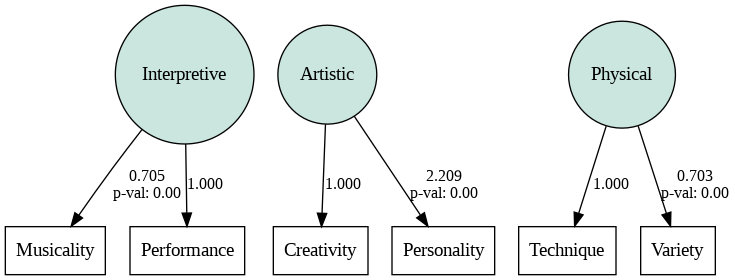

Model 2 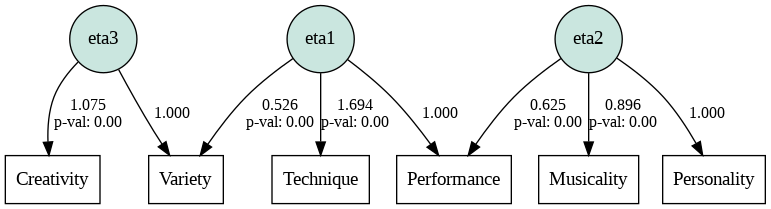

Model 3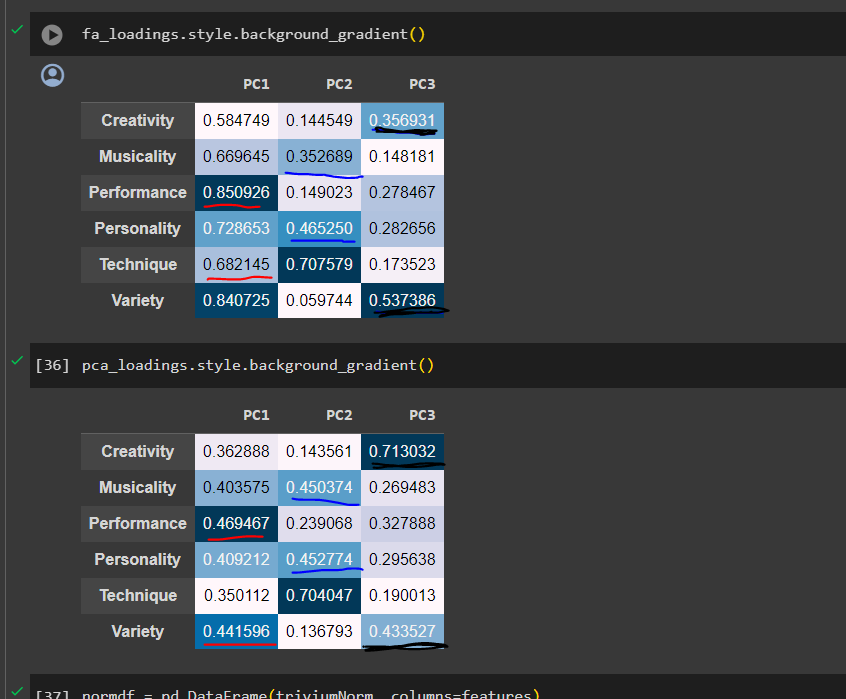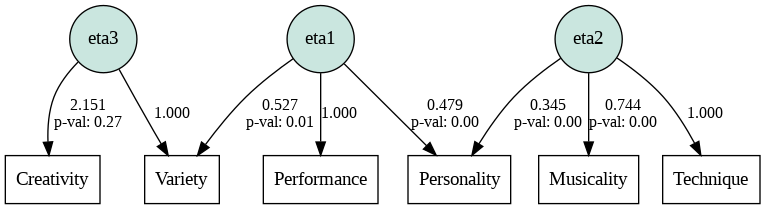


Model 2 appears to be the best-fitting model among the three, as it has the lowest chi-square value, lowest RMSEA, highest CFI, GFI, AGFI, NFI, and TLI values, and relatively lower AIC and BIC values compared to the other models.

Model 3 also shows good fit, but its CFI, GFI, AGFI, NFI, and TLI values are lower than those of Model 2, and its RMSEA value is higher. Its AIC and BIC values are slightly higher than those of Model 2.

Model 1 exhibits the poorest fit among the three models, with the highest chi-square value, highest RMSEA, lowest CFI, GFI, AGFI, NFI, and TLI values, and highest AIC and BIC values.

In summary, Model 2 demonstrates the best fit, followed by Model 3, while Model 1 shows the worst fit. Model 2 is preferred due to its higher goodness-of-fit indices, lower AIC and BIC values, and lower RMSEA, indicating a better balance between model fit and parsimony.